# Pandas 데이터 분석 연습 문제: 시애틀 자전거 통행량

이 문제는 시애틀의 Fremont Bridge 자전거 통행량 데이터를 분석하는 연습을 제공합니다. pandas를 활용하여 데이터 전처리, 날짜 기반 분석, 날씨 데이터 병합 및 상관관계 분석을 수행합니다. (p234 참고)

---

<img src="https://images.seattletimes.com/wp-content/uploads/2020/01/01022020_bike-count_114545.jpg?d=2040x1360" width=400>

Ken Lambert, "Bike ridership hits record highs on 2 Seattle routes", The Seattle Times, Jan. 6, 2020

In [92]:
import numpy as np
import pandas as pd


## 1. 자전거 통행량 데이터 기본 전처리

FremontBridge.csv 파일을 사용하여 시애틀 다리의 자전거 통행량 데이터를 불러오고 기본적인 전처리 작업을 수행합니다.

In [93]:
bicycle_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv'
bicycle_df = pd.read_csv(bicycle_url)

In [94]:
bicycle_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [95]:
bicycle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147278 entries, 0 to 147277
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          147278 non-null  object 
 1   Fremont Bridge Total          147256 non-null  float64
 2   Fremont Bridge East Sidewalk  147256 non-null  float64
 3   Fremont Bridge West Sidewalk  147255 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.5+ MB


In [96]:
bicycle_df['Fremont Bridge Total'].isna().sum()

np.int64(22)

In [97]:
bicycle_df['Fremont Bridge East Sidewalk'].isna().sum()

np.int64(22)

In [98]:
bicycle_df['Fremont Bridge West Sidewalk'].isna().sum()

np.int64(23)




### 1.1 데이터 읽기

- **목표**: FremontBridge.csv 파일을 pandas DataFrame으로 읽어와 df_bike 변수에 저장합니다.
- **힌트**:
    - pandas의 read_csv 함수를 사용하세요.
    - 파일의 경로와 이름을 인자로 전달합니다. (url: 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv')



In [99]:
bicycle_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv'
df_bike = pd.read_csv(bicycle_url)

### 1.2 데이터 미리보기

- **목표**: df_bike DataFrame의 처음 5개 행을 출력하여 데이터 구조와 값을 확인합니다.
- **힌트**:
    - DataFrame의 head 메서드를 사용하면 처음 5개 행을 확인할 수 있습니다.



In [100]:
df_bike.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


### 1.3 데이터 요약 정보 확인

- **목표**: df_bike DataFrame의 컬럼명, 데이터 타입, 유효 값 개수, 메모리 사용량 등 요약 정보를 확인합니다.
- **힌트**:
    - DataFrame의 info 메서드를 호출하여 요약 정보를 확인하세요.



In [101]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147278 entries, 0 to 147277
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          147278 non-null  object 
 1   Fremont Bridge Total          147256 non-null  float64
 2   Fremont Bridge East Sidewalk  147256 non-null  float64
 3   Fremont Bridge West Sidewalk  147255 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.5+ MB


### 1.4 데이터 타입 및 누락값 상세 확인

- **목표**: 각 컬럼의 데이터 타입과 누락값(NaN)의 개수를 확인합니다.
- **힌트**:
    - 데이터 타입은 dtypes 속성으로 확인합니다.
    - 누락값은 isnull 메서드와 sum 메서드를 조합하여 컬럼별 합계를 계산합니다.



In [102]:
df_bike.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [103]:
df_bike.isna().sum()

Date                             0
Fremont Bridge Total            22
Fremont Bridge East Sidewalk    22
Fremont Bridge West Sidewalk    23
dtype: int64

### 1.5 컬럼명 변경

- **목표**: df_bike DataFrame의 컬럼명을 다음과 같이 변경합니다:
    - Fremont Bridge Total → Total
    - Fremont Bridge East Sidewalk → East
    - Fremont Bridge West Sidewalk → West

In [104]:
df_bike.columns = ['Date', 'Total', 'West', 'East']

In [105]:
df_bike.head()

,Date,Total,West,East
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


### 1.6 'Date' 컬럼 타입 변경

- **목표**: Date 컬럼을 문자열(object)에서 datetime 형식으로 변환하여 df_bike['Date']에 할당합니다.
- **힌트**:
    - pandas의 to_datetime 함수에 df_bike['Date']를 전달하여 변환합니다.



In [106]:
df_bike['Date'] = pd.to_datetime(df_bike['Date'],format='%m/%d/%Y %H:%M:%S %p')

In [107]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147278 entries, 0 to 147277
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    147278 non-null  datetime64[ns]
 1   Total   147256 non-null  float64       
 2   West    147256 non-null  float64       
 3   East    147255 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.5 MB


### 1.7 'Date' 컬럼을 인덱스로 설정

- **목표**: datetime 형식으로 변환된 Date 컬럼을 df_bike의 행 인덱스로 설정합니다.
- **힌트**:
    - set_index 메서드에 Date 컬럼명을 전달합니다.



In [108]:
df_bike.set_index('Date', inplace=True)

In [109]:
df_bike.head()

,Total,West,East
Date,,,
2019-11-01 12:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


### 1.8 누락값 처리

- **목표**: Total, East, West 컬럼의 누락값(NaN)을 각 컬럼의 평균값으로 채웁니다.
- **힌트**:
    - 각 컬럼에 fillna 메서드를 사용하고, 채울 값으로 해당 컬럼의 mean 값을 전달합니다.


In [110]:
df_bike.describe()

,Total,West,East
count,147256.000000,147256.000000,147255.000000
mean,110.340794,50.077504,60.263699
std,140.421808,64.633895,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [111]:
df_bike.fillna(df_bike.mean(), inplace=True)

In [112]:
df_bike.describe()

,Total,West,East
count,147278.000000,147278.000000,147278.000000
mean,110.340794,50.077504,60.263699
std,140.411320,64.629067,87.245334
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [113]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147278 entries, 2019-11-01 12:00:00 to 2021-12-31 11:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   147278 non-null  float64
 1   West    147278 non-null  float64
 2   East    147278 non-null  float64
dtypes: float64(3)
memory usage: 4.5 MB




## 2. 날짜 관련 데이터 분석 (자전거 통행량)

시간 정보를 활용하여 자전거 통행량의 패턴을 분석하고 시각화합니다.



### 2.1 주간 단위 총 통행량 시각화

- **목표**: Total 컬럼의 일별 통행량을 주간 단위로 합산하여 선 그래프(line plot)로 시각화합니다.
- **힌트**:
    - Total 컬럼을 선택한 후 resample('W')로 주간 단위로 그룹화하고 sum으로 합계를 계산합니다.
    - plot 메서드로 선 그래프를 그립니다.



In [114]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147278 entries, 2019-11-01 12:00:00 to 2021-12-31 11:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   147278 non-null  float64
 1   West    147278 non-null  float64
 2   East    147278 non-null  float64
dtypes: float64(3)
memory usage: 4.5 MB


<Axes: xlabel='Date'>

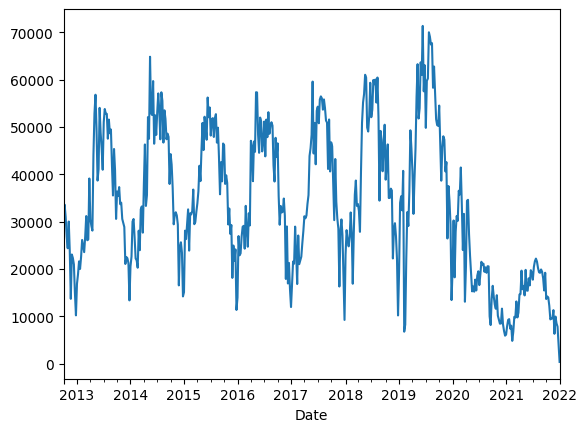

In [115]:
df_bike['Total'].resample('W').sum().plot.line()

### 2.2 시간대별 평균 통행량 시각화

- **목표**: 하루 24시간(0~23시)별 평균 Total 통행량을 계산하고 막대 그래프(bar plot)로 시각화합니다.
- **힌트**:
    - 인덱스의 시간 정보(df_bike.index.hour)를 기준으로 groupby 연산을 수행합니다.
    - Total 컬럼의 mean 값을 계산하고 plot(kind='bar')로 막대 그래프를 그립니다.



<Axes: xlabel='Date'>

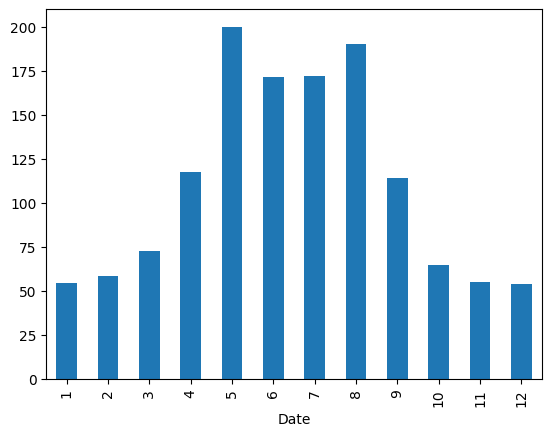

In [118]:
df_bike.groupby(df_bike.index.hour)['Total'].mean().plot(kind='bar')

### 2.3 요일별 평균 통행량 시각화

- **목표**: 요일별(월~일) 평균 Total 통행량을 계산하고 막대 그래프로 시각화합니다.
- **힌트**:
    - 인덱스의 요일 이름(df_bike.index.day_name())을 기준으로 groupby 연산을 수행합니다.
    - Total 컬럼의 mean 값을 계산하고 plot(kind='bar')로 막대 그래프를 그립니다.



<Axes: xlabel='Date'>

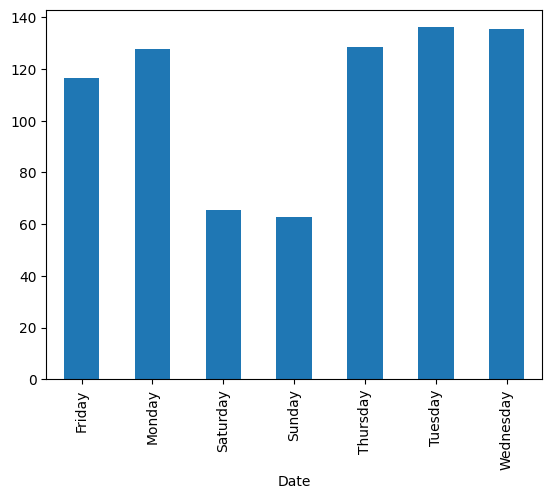

In [119]:
df_bike.groupby(df_bike.index.day_name())['Total'].mean().plot.bar()

### 2.4 요일 및 시간대별 평균 통행량 (Pivot Table)

- **목표**: 피벗 테이블을 사용하여 시간대(행)와 요일(열)에 따른 평균 Total 통행량 표를 생성합니다.
- **힌트**:
    - pivot_table 메서드에서 values='Total', index=df_bike.index.hour, columns=df_bike.index.day_name(), aggfunc='mean'을 지정합니다.



In [ ]:
df_bike.index.duplicated().any()

np.True_

In [128]:
# pd.crosstab(df_bike.index.hour, df_bike.index.day_name(), values=df_bike['Total'], aggfunc='mean') // 날짜:시간 값 중에 중복이 있어서 오류 남.

pd.pivot_table(df_bike, index=df_bike.index.hour, columns=df_bike.index.day_name(), values='Total', aggfunc='mean')

Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,
1,49.774230,44.808790,74.948059,79.025143,44.863895,43.291096,44.894198
2,55.931015,50.192352,74.776826,80.557012,49.087130,48.085616,50.000000
3,78.777081,69.387557,74.122717,75.968000,69.013667,69.691210,70.597610
4,137.815279,133.158676,69.494863,68.580000,133.272779,140.566210,140.824701
5,215.868301,261.440639,61.202626,56.789143,252.947039,278.027968,272.295390
6,173.159065,222.300799,54.415525,47.384000,220.926538,241.492009,238.313603
7,183.278221,219.223744,48.653539,41.582857,224.465262,246.196918,241.505976
8,209.509692,244.313927,54.937215,46.172571,248.267084,266.426370,260.305635
9,124.538587,134.516553,60.486301,51.576571,138.712415,143.601598,145.474104


### 2.5 30일 이동 평균 통행량 시각화

- **목표**: Total 통행량의 30일 이동 평균을 계산하고 선 그래프로 시각화합니다.
- **힌트**:
    - Total 컬럼에 rolling(window=30)을 적용하고 mean으로 평균을 계산합니다.
    - plot 메서드로 선 그래프를 그립니다.



<Axes: xlabel='Date'>

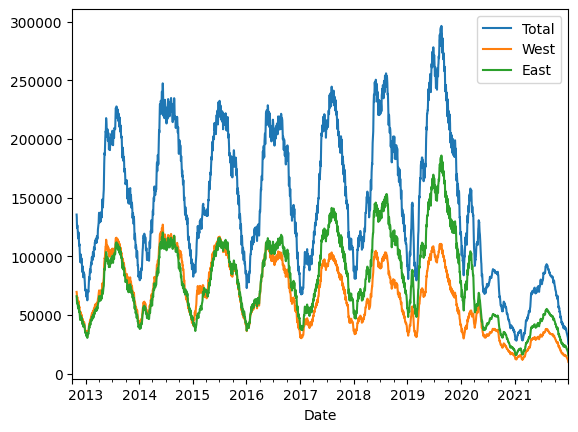

In [134]:
df_bike.resample('D').sum().rolling(30).sum().plot.line()

## 3. 날씨 데이터 병합 및 분석

SeattleWeather.csv 파일의 날씨 데이터를 읽어와 자전거 통행량 데이터와 병합하여 날씨와 통행량의 관계를 분석합니다.


### 3.1 날씨 데이터 읽기 및 기본 전처리

- **목표**:
    - SeattleWeather.csv 파일을 df_weather DataFrame으로 읽습니다. (url: https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/SeattleWeather.csv)
    - DATE 컬럼을 datetime 형식으로 변환하고 인덱스로 설정합니다.
    - PRCP 컬럼의 누락값을 0으로 채웁니다.


### 3.2 데이터프레임 병합 (Merge)

- **목표**: df_bike와 df_weather를 날짜 인덱스를 기준으로 병합하여 df_merged에 저장합니다.
- **힌트**:
    - pd.merge 함수에 df_bike, df_weather, left_index=True, right_index=True 옵션을 전달합니다.



### 3.3 강수량과 자전거 통행량 관계 분석

- **목표**:
    - PRCP와 Total 간의 관계를 산점도(scatter plot)로 시각화합니다.
    - 두 변수의 상관계수를 계산합니다.
- **힌트**:
    - df_merged.plot.scatter로 산점도를 그립니다.
    - sns.scatterplot 로 산점도를 그립니다.
    - df_merged['PRCP'].corr 로 상관계수를 계산합니다.



### 3.4 기온과 자전거 통행량 관계 분석

- **목표**: TAVG(또는 TMAX, TMIN)와 Total 간의 관계를 산점도 또는 구간별 평균 통행량으로 분석합니다.
- **힌트**:
    - 산점도는 df_merged.plot.scatter(x='TAVG', y='Total')로 그립니다.
    - 구간별 분석은 pd.cut으로 기온을 구간화하고 groupby로 평균을 계산한 후 plot으로 시각화합니다.



### 3.5 날씨 조건에 따른 통행량 비교

- **목표**: 비가 온 날(PRCP > 0)과 비가 오지 않은 날(PRCP = 0)의 평균 Total 통행량을 비교합니다.
- **힌트**:
    - 불리언 인덱싱으로 조건 (비가 온 날과 비가 오지 않은 날)을 설정합니다.